In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
print('No. of missing values in Dataframe is: ' + str(df.isnull().sum().sum()))

No. of missing values in Dataframe is: 0


In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

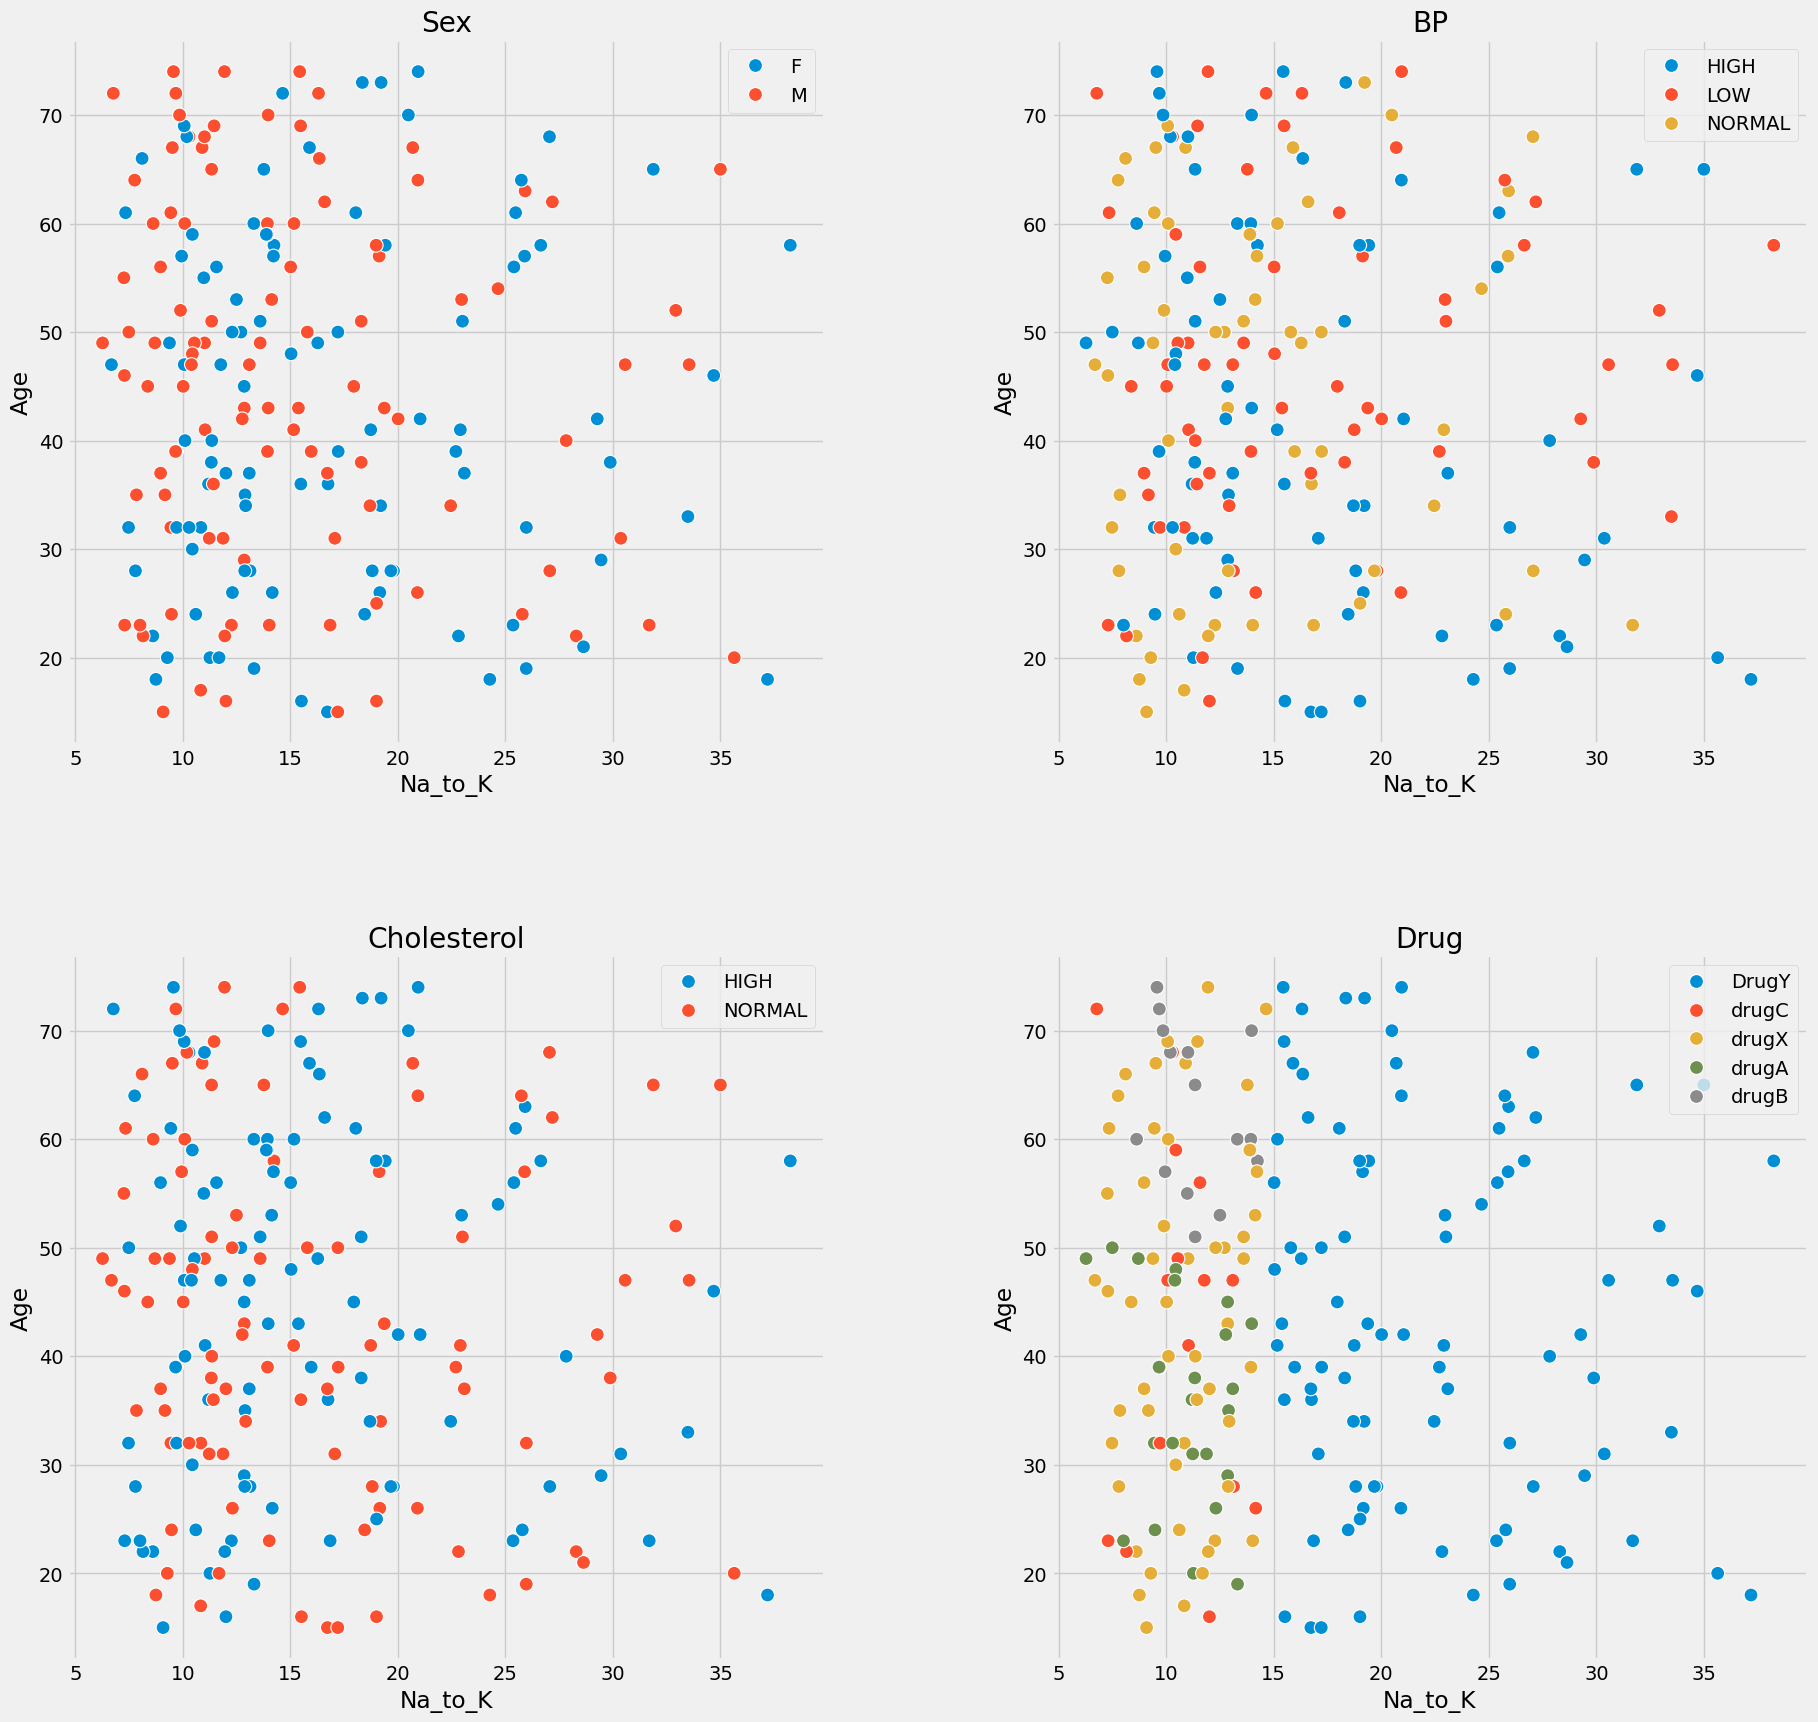

In [ ]:
plt.figure(1,figsize=(20,20))
n = 0
for col in ['Sex', 'BP', 'Cholesterol','Drug']:
    n+=1
    plt.subplot(2,2,n)
    plt.subplots_adjust(hspace=0.3,wspace = 0.3)
    sns.scatterplot(x = 'Na_to_K',y = 'Age',data = df,hue = col,s = 100)
    plt.title(col)
    plt.legend(loc = 0)

<Axes: xlabel='count', ylabel='Drug'>

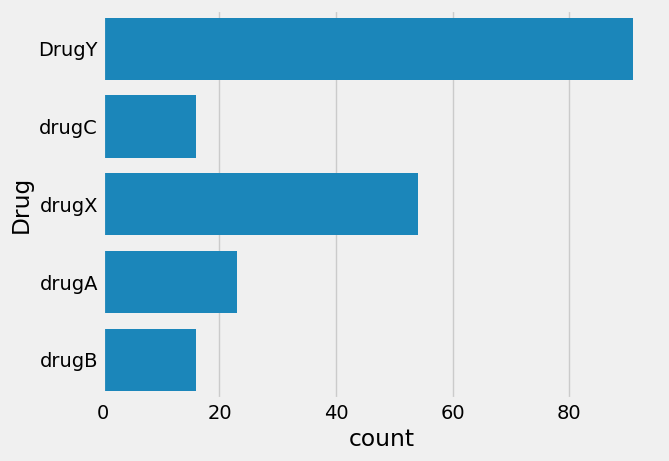

In [ ]:
sns.countplot(df["Drug"])

In [ ]:
df['Drug'] = pd.Categorical(df['Drug'])
df['Code'] = df['Drug'].cat.codes
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Code
0,23,F,HIGH,HIGH,25.355,DrugY,0
1,47,M,LOW,HIGH,13.093,drugC,3
2,47,M,LOW,HIGH,10.114,drugC,3
3,28,F,NORMAL,HIGH,7.798,drugX,4
4,61,F,LOW,HIGH,18.043,DrugY,0


In [ ]:
temp = pd.get_dummies(df[['Sex', 'BP', 'Cholesterol']])
temp.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,1,0,1,0,0,1,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0
3,1,0,0,0,1,1,0
4,1,0,0,1,0,1,0


In [ ]:
df = pd.concat([df,temp],axis = 1)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Code,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,F,HIGH,HIGH,25.355,DrugY,0,1,0,1,0,0,1,0
1,47,M,LOW,HIGH,13.093,drugC,3,0,1,0,1,0,1,0
2,47,M,LOW,HIGH,10.114,drugC,3,0,1,0,1,0,1,0
3,28,F,NORMAL,HIGH,7.798,drugX,4,1,0,0,0,1,1,0
4,61,F,LOW,HIGH,18.043,DrugY,0,1,0,0,1,0,1,0


In [ ]:
df = df.drop(['Sex', 'BP', 'Cholesterol'],axis = 1)
df.head()

,Age,Na_to_K,Drug,Code,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,DrugY,0,1,0,1,0,0,1,0
1,47,13.093,drugC,3,0,1,0,1,0,1,0
2,47,10.114,drugC,3,0,1,0,1,0,1,0
3,28,7.798,drugX,4,1,0,0,0,1,1,0
4,61,18.043,DrugY,0,1,0,0,1,0,1,0


In [ ]:
df.columns

Index(['Age', 'Na_to_K', 'Drug', 'Code', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW',
       'BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL'],
      dtype='object')

In [ ]:
X = df[['Age', 'Na_to_K', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW','BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL']]
y = df['Code']
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X, y, test_size = 0.33, random_state = 7)
for setd,name in zip([X_train,X_test,y_train,y_test],['X_train','X_test','y_train','y_test']):
  print(name + ' shape : ' + str(setd.shape))

X_train shape : (134, 9)
X_test shape : (66, 9)
y_train shape : (134,)
y_test shape : (66,)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy Score = {accuracy_score(y_test,y_pred)}")

Accuracy Score = 0.9393939393939394


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       1.00      1.00      1.00         7
           2       0.83      0.71      0.77         7
           3       0.86      1.00      0.92         6
           4       0.88      0.93      0.90        15

    accuracy                           0.94        66
   macro avg       0.91      0.92      0.92        66
weighted avg       0.94      0.94      0.94        66

